In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

path_to_data = '/home/gterren/dynamic_update/validation/'

param_names_ = ['forget_rate_f',
                'forget_rate_e',
                'length_scale_f',
                'length_scale_e',
                'lookup_rate',
                'trust_rate', 
                'nu', 
                'gamma', 
                'xi',
                'kappa_min', 
                'kappa_max']

param_symbols_ = [r'$\varepsilon_f$',
                  r'$\varepsilon_e$',
                  r'$\lambda_f$',
                  r'$\lambda_e$',
                  r'$\beta$',
                  r'$\alpha$', 
                  r'$\nu$', 
                  r'$\rho$', 
                  r'$\xi$',
                  r'$\kappa_{\min}$', 
                  r'$\kappa_{\max}$']

length_scale_f 72 [0.05]
length_scale_f 144 [0.025]
length_scale_f 216 [0.01]
length_scale_e 72 [0.25]
length_scale_e 144 [0.25]
length_scale_e 216 [0.5]
lookup_rate 72 [0.00033]
lookup_rate 144 [0.001]
lookup_rate 216 [0.00066]
gamma 72 [210]
gamma 144 [240]
gamma 216 [300]
xi 72 [0.7]
xi 144 [0.7]
xi 216 [0.75]
kappa_min 72 [50]
kappa_min 144 [200]
kappa_min 216 [50]
kappa_max 72 [600]
kappa_max 144 [400]
kappa_max 216 [1100]


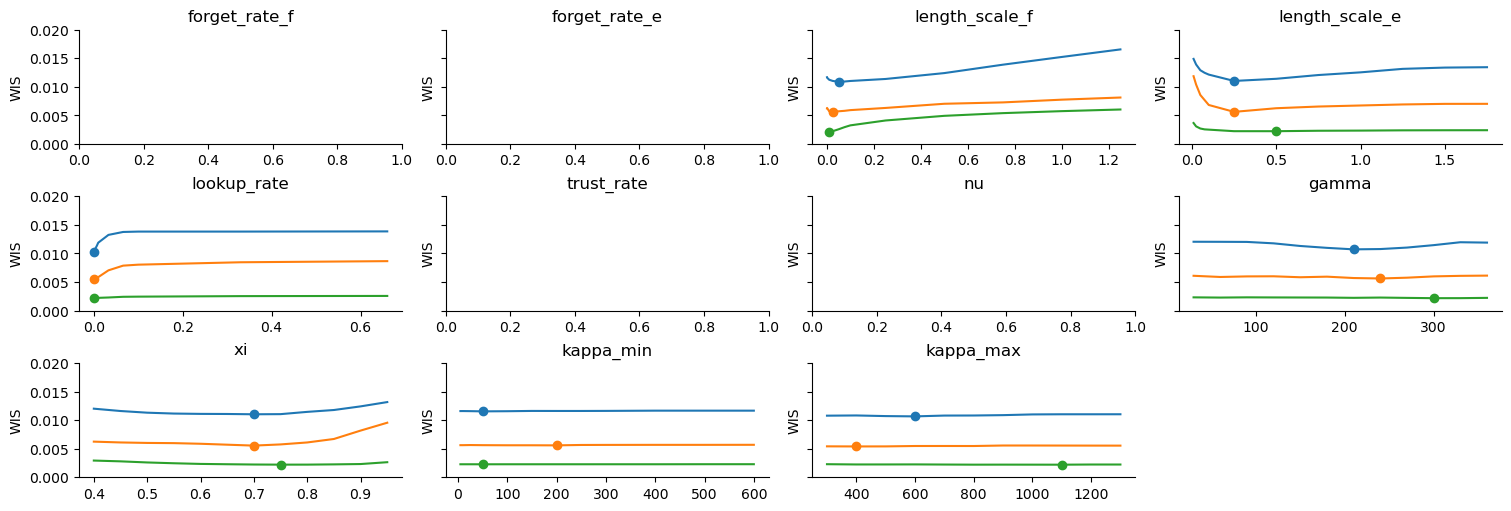

In [33]:

def _plot_parameter_validation(_ax, intervals_, param_name, path_to_data):
    for interval in intervals_:
        try:
            rs_ = pd.read_csv(path_to_data + f'archive/ffc_validation-WIS-{interval}-{param_name}.csv')
            rs_ = rs_[[param_name, 'WIS_eCDF']].rename(columns = {'WIS_eCDF': 'score'})

            rs_agg_ = rs_.groupby([param_name]).agg('median').reset_index(drop = False)

            _ax.plot(rs_agg_[param_name], rs_agg_['score'])
            _ax.scatter(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name], rs_agg_['score'].min())
            print(param_name, interval, rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name].to_numpy())
        except: 
            pass

intervals_ = [72, 144, 216]

fig, _ax = plt.subplot_mosaic([["a", "b", "c", "d"],
                               ["e", "f", "g", "h"],
                               ["i", "j", "k", "."]],
                               figsize     = (15, 5),
                               layout      = "constrained", 
                               sharey = True,
                               gridspec_kw = dict(width_ratios  = (1, 1, 1, 1)))

for param_name, param_symbol, item in zip(param_names_, param_names_, _ax):
    _ax[item].set_title(param_symbol)
    _plot_parameter_validation(_ax[item], intervals_, param_name, path_to_data)
    _ax[item].set_ylim(0, 0.02)
    _ax[item].spines['top'].set_visible(False)
    _ax[item].spines['right'].set_visible(False)
    _ax[item].set_ylabel('WIS')
plt.show()


(40150, 17)
(array([0, 1, 2, 3, 4]), array([  505,   945,  6281, 32315,   104]))
    lookup_rate     score
0       0.00010  0.005548
1       0.00033  0.005560
2       0.00066  0.005541
3       0.00100  0.005538
4       0.00330  0.005592
5       0.00660  0.005680
6       0.03300  0.007048
7       0.06600  0.007871
8       0.10000  0.008041
9       0.33000  0.008461
10      0.66000  0.008657


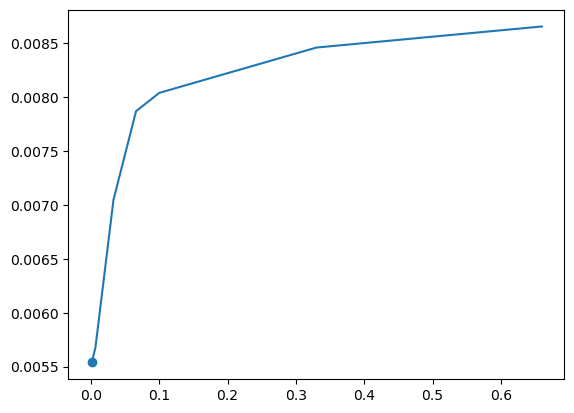

3    0.001
Name: lookup_rate, dtype: float64


In [44]:
param_name = 'lookup_rate'

rs_ = pd.read_csv(path_to_data + f'archive/ffc_validation-WIS-144-{param_name}.csv')
print(rs_.shape)
print(np.unique(rs_['status'], return_counts = True))

# idx_ = (rs_['time'] == 144) #& ( (rs_['status'] == 0) | (rs_['status'] == 4) )
# rs_  = rs_.loc[idx_].reset_index(drop = True)
# print(rs_.shape)

rs_ = rs_[[param_name, 'WIS_eCDF']].rename(columns = {'WIS_eCDF': 'score'})

rs_agg_ = rs_.groupby([param_name]).agg('median').reset_index(drop = False)
print(rs_agg_)

plt.figure()
plt.plot(rs_agg_[param_name], rs_agg_['score'])
plt.scatter(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name], rs_agg_['score'].min())
plt.show()

print(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name])

(131400, 17) (array([0, 1, 2, 3, 4]), array([  3289,   1214,  19015, 107570,    312]))
    kappa_max   time  asset    day     score
0         200  144.0    4.5  182.0  0.012325
1         400  144.0    4.5  182.0  0.012289
2         600  144.0    4.5  182.0  0.012311
3         800  144.0    4.5  182.0  0.012262
4        1000  144.0    4.5  182.0  0.012285
5        1200  144.0    4.5  182.0  0.012356
6        1400  144.0    4.5  182.0  0.012410
7        1600  144.0    4.5  182.0  0.012435
8        1800  144.0    4.5  182.0  0.012485
9        2000  144.0    4.5  182.0  0.012484
10       2200  144.0    4.5  182.0  0.012536
11       2400  144.0    4.5  182.0  0.012530


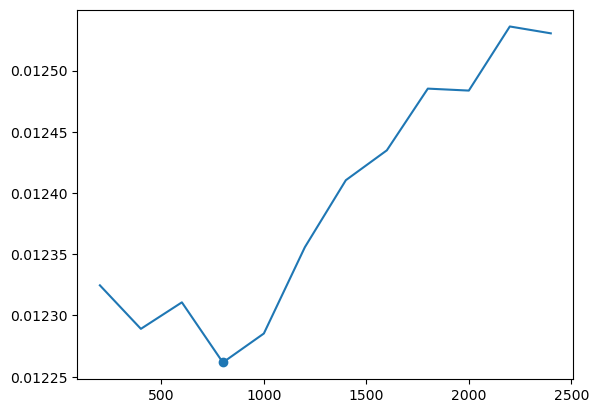

800
1400
200
800
200
1400
200
1800
600
1200
600


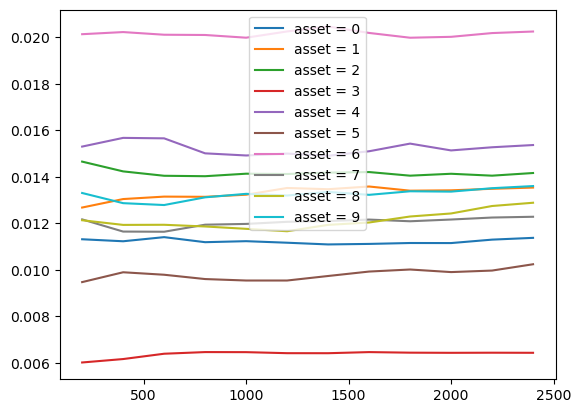

840.0 700.0
1600
1400
200


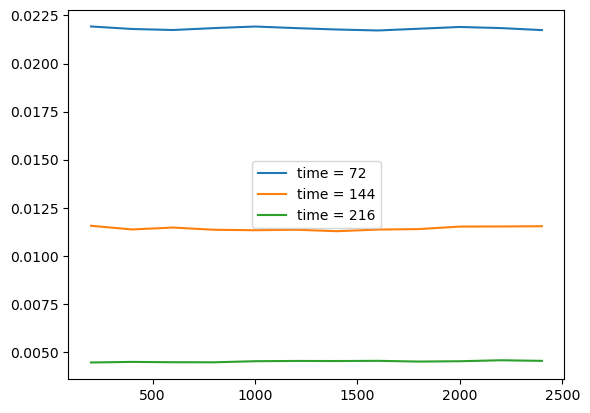

1066.6666666666667 1400.0


In [12]:
param_name = 'kappa_max'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}-med.csv')
print(rs_.shape, np.unique(rs_['status'], return_counts = True))

rs_ = rs_[[param_name, 'time', 'asset', 'day', 'WIS_eCDF']].rename(columns = {'WIS_eCDF': 'score'})

rs_agg_ = rs_.groupby([param_name]).agg('median').reset_index(drop = False)
print(rs_agg_)

plt.figure()
plt.plot(rs_agg_[param_name], rs_agg_['score'])
plt.scatter(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name], rs_agg_['score'].min())
plt.show()
print(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name].to_numpy()[0].min())

rs_agg_ = rs_.groupby([param_name, 'asset']).agg('median').reset_index(drop = False)

min_ = []

plt.figure()
for asset in np.unique(rs_agg_['asset']):
    x_ = rs_agg_.loc[rs_agg_['asset'] == asset, param_name]
    y_ = rs_agg_.loc[rs_agg_['asset'] == asset, 'score']
    plt.plot(x_, y_, label = f'asset = {asset}')
    min_.append(x_[y_ == y_.min()].to_numpy()[0].min())
    print(x_[y_ == y_.min()].to_numpy()[0].min())
plt.legend()
plt.show()

print(np.mean(min_), np.median(min_))

rs_agg_ = rs_.groupby([param_name, 'time']).agg('median').reset_index(drop = False)

min_ = []

plt.figure()
for time in np.unique(rs_agg_['time']):
    x_ = rs_agg_.loc[rs_agg_['time'] == time, param_name]
    y_ = rs_agg_.loc[rs_agg_['time'] == time, 'score']
    plt.plot(x_, y_, label = f'time = {time}')
    min_.append(x_[y_ == y_.min()].to_numpy()[0].min())
    print(x_[y_ == y_.min()].to_numpy()[0].min())
plt.legend()
plt.show()

print(np.mean(min_), np.median(min_))

In [25]:
param_name = 'kappa_min'
time = 72

rs_ = pd.read_csv(path_to_data + f'validation_ffc-WIS-{param_name}-{time}-med.csv')
print(rs_.shape)
rs_ = rs_.dropna()
print(rs_.shape)

rs_ = rs_[[param_name, 'time', 'asset', 'day', 'WIS_eCDF']].rename(columns = {'WIS_eCDF': 'score'})

df_ = []
for time in np.unique(rs_['time']):
    rs_agg_ = rs_.loc[rs_['time'] == time].copy()
    rs_agg_ = rs_agg_.groupby([param_name, 'asset']).agg('median').reset_index(drop = False)
    rs_agg_ = rs_agg_.groupby([param_name]).agg('sum').reset_index(drop = False)


    df_.append([time, asset, rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name].to_numpy()[0]])
df_ = pd.DataFrame(df_, columns = ['time', 'asset', 'score'])
df_ = df_[['time', 'score']].groupby(['time']).agg('median').reset_index(drop = False)
print(df_)

(43800, 17)
(43800, 17)


NameError: name 'asset' is not defined

In [50]:
param_name = 'kappa_max'

rs_ = pd.read_csv(path_to_data + f'validation_ffc-WIS-{param_name}-144.csv')
print(rs_.shape)

rs_ = rs_[['asset', param_name, 'WIS_eCDF']]

rs_ = rs_.groupby(['asset', param_name]).agg({'WIS_eCDF': 'median'}).reset_index(drop = False)

table_ = rs_.pivot(index = 'asset', columns = param_name, values='WIS_eCDF')
print(table_.idxmin(axis=1))

print(rs_.groupby([param_name]).agg({'WIS_eCDF': 'median'}).reset_index(drop = False))


(83955, 17)
asset
0     2400
1      800
2     2400
3      600
4      200
5      200
6     1600
7      600
8     1600
9      600
10    1600
11     600
12     400
13    1600
14    2000
15     200
16    2000
17    2400
18    1400
19     800
dtype: int64
    kappa_max  WIS_eCDF
0         200  4.290563
1         400  4.306129
2         600  4.277212
3         800  4.229962
4        1000  4.309225
5        1200  4.347569
6        1400  4.308657
7        1600  4.339173
8        1800  4.317744
9        2000  4.328091
10       2200  4.370014
11       2400  4.332219


In [ ]:
time = 144

dfs_ = []
for param_name in param_names_[9:]:
    rs_ = pd.read_csv(path_to_data + f'validation_ffc-WIS-{param_name}-{time}.csv')
    print(param_name, rs_.shape)
    #rs_ = rs_.dropna()
    #print(param_name, rs_.shape)

    rs_ = rs_[[param_name, 'time', 'asset', 'day', 'WIS_eCDF']].rename(columns = {'WIS_eCDF': 'score'})

    df_ = []

    for asset in np.unique(rs_['asset']):
        idx_    = (rs_['time'] == time) & (rs_['asset'] == asset)
        rs_agg_ = rs_.loc[idx_].groupby([param_name]).agg('median').reset_index(drop = False)
        print(asset, rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name].to_numpy()[0], rs_agg_['score'].min())
        df_.append([time, asset, rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name].to_numpy()[0]])

    df_ = pd.DataFrame(df_, columns = ['time', 'asset', param_name])
    df_ = df_[['time', param_name]].groupby(['time']).agg('median').reset_index(drop = False)
    dfs_.append(df_)

dfs_         = pd.concat(dfs_, axis = 0).reset_index(drop = True).fillna(0)
dfs_         = dfs_.groupby(['time']).agg('sum').reset_index(drop = False).T
dfs_.columns = dfs_.iloc[0]
dfs_         = dfs_[1:]
print(dfs_)

kappa_min (43800, 17)
0 600 3.5983883676714346
1 350 3.892762563449952
2 600 5.005648644203163
3 600 2.051250407410261
4 300 5.551437875175812
5 600 3.2733915519642025
6 350 4.757150344457815
7 600 4.008158372408403
8 600 2.7867528107037
9 350 5.188754689705251
kappa_max (43800, 17)
0 2400 3.7278078585845646
1 800 4.197088599506924
2 2400 4.964953888374247
3 600 2.0670321743893108
4 200 5.542554482754909
5 200 3.2362981766471
6 1600 4.621494153121428
7 600 4.164094387809994
8 1600 2.6552870531774864
9 600 5.303546517052579
time       144.0
kappa_min  600.0
kappa_max  700.0


In [24]:
param_name = 'zeta_3'
time       = 72
depth      = 'DQ'

rs_wis_ = pd.read_csv(path_to_data + f'ffc_calibration-WIS-{time}-{param_name}-{depth}.csv')
rs_cs_ = pd.read_csv(path_to_data + f'ffc_calibration-CS-{time}-{param_name}-{depth}.csv')
print(rs_wis_[param_name].unique())

# print(rs_cs_.shape, rs_wis_.shape)
# print(rs_wis_.columns)
# rs_wis_ = rs_wis_[[param_name, 'WIS']]

# rs_wis_ = rs_wis_.groupby([param_name]).agg('median').reset_index(drop = False)
# print(rs_wis_)

[0.3]


(43800, 17)
(array([0, 1, 2, 3, 4]), array([ 2412,  1090,  6244, 33982,    72]))
    gamma     score
0     135  0.002397
1     150  0.002448
2     165  0.002467
3     180  0.002459
4     195  0.002448
5     210  0.002406
6     225  0.002425
7     240  0.002374
8     255  0.002355
9     270  0.002363
10    285  0.002335
11    300  0.002319


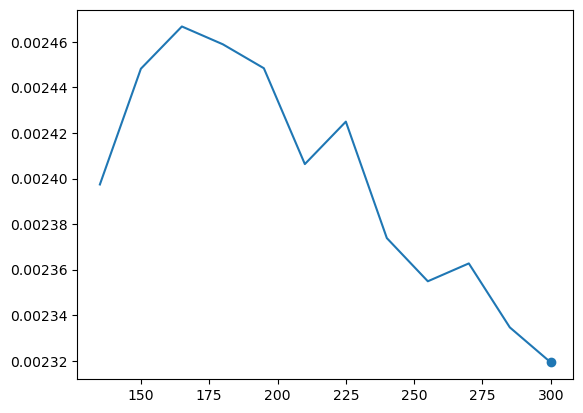

11    300
Name: gamma, dtype: int64


In [ ]:
param_name = 'gamma'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}_med-2.csv')
print(rs_.shape)
print(np.unique(rs_['status'], return_counts = True))

# idx_ = (rs_['time'] == 144) #& (rs_['status'] == 3) 
# rs_  = rs_.loc[idx_].reset_index(drop = True)
# print(rs_.shape)

rs_ = rs_[[param_name, 'WIS_eCDF']].rename(columns = {'WIS_eCDF': 'score'})

rs_agg_ = rs_.groupby([param_name]).agg('median').reset_index(drop = False)
print(rs_agg_)

plt.figure()
plt.plot(rs_agg_[param_name], rs_agg_['score'])
plt.scatter(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name], rs_agg_['score'].min())
#plt.ylim(0,)
plt.show()

print(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name])

(43800, 17)
(array([0, 1, 2, 3, 4]), array([ 6956,  1497,  7478, 18480,  9389]))
    forget_rate_f     score
0          0.0010  0.007345
1          0.0050  0.007156
2          0.0075  0.007057
3          0.0100  0.007027
4          0.0500  0.006504
5          0.0750  0.006196
6          0.1000  0.006036
7          0.2500  0.005978
8          0.5000  0.005906
9          0.7500  0.005835
10         1.0000  0.005819
11        10.0000  0.005828


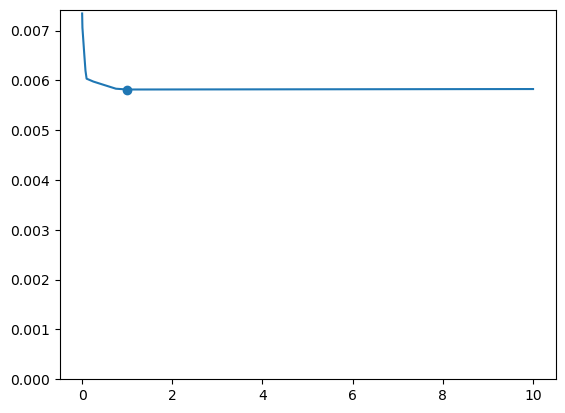

10    1.0
Name: forget_rate_f, dtype: float64


In [38]:
param_name = 'forget_rate_f'

rs_ = pd.read_csv(path_to_data + f'144/ffc_validation-WIS-{param_name}_med-2.csv')
print(rs_.shape)
print(np.unique(rs_['status'], return_counts = True))

# idx_ = (rs_['time'] == 144) #& ((rs_['status'] == 0) | (rs_['status'] == 3))
# rs_  = rs_.loc[idx_].reset_index(drop = True)
# print(rs_.shape)

rs_ = rs_[[param_name, 'WIS_eCDF']].rename(columns = {'WIS_eCDF': 'score'})

rs_agg_ = rs_.groupby([param_name]).agg('median').reset_index(drop = False)
print(rs_agg_)

plt.figure()
plt.plot(rs_agg_[param_name], rs_agg_['score'])
plt.scatter(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name], rs_agg_['score'].min())
plt.ylim(0,)
plt.show()

print(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name])

(43800, 17)
(array([0, 1, 2, 3, 4]), array([ 4139,   974,  5709, 29794,  3184]))
    length_scale_f     score
0          0.00050  0.011887
1          0.00075  0.011500
2          0.01000  0.011248
3          0.02500  0.011033
4          0.05000  0.010960
5          0.07500  0.010951
6          0.10000  0.010919
7          0.25000  0.011295
8          0.50000  0.012623
9          0.75000  0.013969
10         1.00000  0.015346
11         1.25000  0.016539


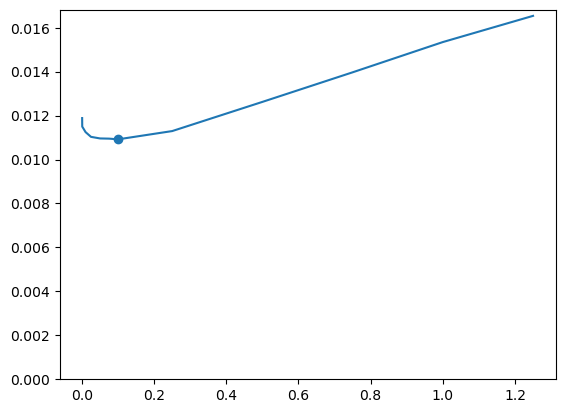

6    0.1
Name: length_scale_f, dtype: float64


In [52]:
param_name = 'length_scale_f'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}_med-2.csv')
print(rs_.shape)
print(np.unique(rs_['status'], return_counts = True))

# idx_ = (rs_['time'] == 144) #& ((rs_['status'] == 0) | (rs_['status'] == 3))
# rs_  = rs_.loc[idx_].reset_index(drop = True)
# print(rs_.shape)

rs_ = rs_[[param_name, 'WIS_eCDF']].rename(columns = {'WIS_eCDF': 'score'})

rs_agg_ = rs_.groupby([param_name]).agg('median').reset_index(drop = False)
print(rs_agg_)

plt.figure()
plt.plot(rs_agg_[param_name], rs_agg_['score'])
plt.scatter(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name], rs_agg_['score'].min())
plt.ylim(0, )
plt.show()

print(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name])

(43800, 17)
(array([0, 1, 2, 3, 4]), array([ 2564,  1908, 10957, 27999,   372]))
    forget_rate_e     score
0            0.20  0.011064
1            0.30  0.011046
2            0.40  0.011033
3            0.50  0.011021
4            0.60  0.011018
5            0.70  0.011017
6            0.80  0.011031
7            0.90  0.011036
8            1.00  0.011032
9            1.10  0.011045
10           1.20  0.011058
11           1.25  0.011053


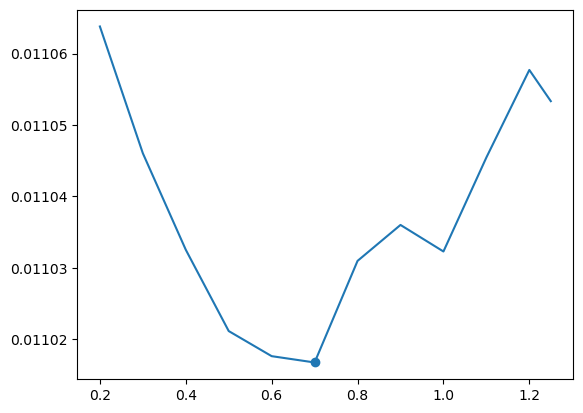

5    0.7
Name: forget_rate_e, dtype: float64


In [55]:
param_name = 'forget_rate_e'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}_med-2.csv')
print(rs_.shape)
print(np.unique(rs_['status'], return_counts = True))

# idx_ = (rs_['time'] == 144) #& ( (rs_['status'] == 0) | (rs_['status'] == 3))
# rs_  = rs_.loc[idx_].reset_index(drop = True)
# print(rs_.shape)

rs_ = rs_[[param_name, 'WIS_eCDF']].rename(columns = {'WIS_eCDF': 'score'})

rs_agg_ = rs_.groupby([param_name]).agg('median').reset_index(drop = False)
print(rs_agg_)

plt.figure()
plt.plot(rs_agg_[param_name], rs_agg_['score'])
plt.scatter(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name], rs_agg_['score'].min())
#plt.ylim(0, )
plt.show()

print(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name])

(43800, 17)
(array([0, 1, 2, 3, 4]), array([ 5659,  1152,  6166, 22888,  7935]))
    length_scale_e     score
0            0.010  0.012652
1            0.025  0.012014
2            0.050  0.011466
3            0.075  0.011361
4            0.100  0.011234
5            0.250  0.011033
6            0.500  0.011716
7            0.750  0.012213
8            1.000  0.012915
9            1.250  0.013216
10           1.500  0.013360
11           1.750  0.013464


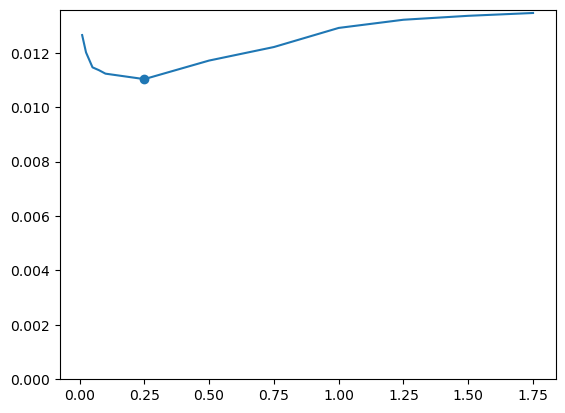

5    0.25
Name: length_scale_e, dtype: float64


In [56]:
param_name = 'length_scale_e'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}_med-2.csv')
print(rs_.shape)
print(np.unique(rs_['status'], return_counts = True))

# idx_ = (rs_['time'] == 144) #& ( (rs_['status'] == 0) | (rs_['status'] == 1) |(rs_['status'] == 2) | (rs_['status'] == 3))
# rs_  = rs_.loc[idx_].reset_index(drop = True)
# print(rs_.shape)

rs_ = rs_[[param_name, 'WIS_eCDF']].rename(columns = {'WIS_eCDF': 'score'})

rs_agg_ = rs_.groupby([param_name]).agg('median').reset_index(drop = False)
print(rs_agg_)

plt.figure()
plt.plot(rs_agg_[param_name], rs_agg_['score'])
plt.scatter(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name], rs_agg_['score'].min())
plt.ylim(0,)
plt.show()
print(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name])